In [3]:
import glob
import os
import pretty_midi

In [1]:
	
# Uncomment to install dependecies to run on Colab:
#!sudo apt-get install fluidsynth
#!pip install pretty_midi mir_eval pyfluidsynth

# For Python2.6 compatibility
from __future__ import print_function

import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display

In [4]:
midi_files = glob.glob(os.path.join('Dataset-RAW', '*'))

In [5]:
midi_files[0]

'Dataset-RAW/Carol_of_the_Bells_four-hands_piano.mid'

In [6]:
test = midi_files[0]

In [7]:
# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI('Dataset-RAW/Canon_de_Pachelbel_4_mains.mid')
# Print an empirical estimate of its global tempo
print(midi_data.estimate_tempo())
# Compute the relative amount of each semitone across the entire song,
# a proxy for key
total_velocity = sum(sum(midi_data.get_chroma()))
print ([sum(semitone)/total_velocity for semitone in midi_data.get_chroma()])
# Shift all notes up by 5 semitones
for instrument in midi_data.instruments:
    # Don't want to shift drum notes
    if not instrument.is_drum:
        for note in instrument.notes:
            note.pitch += 5
# Synthesize the resulting MIDI data using sine waves
audio_data = midi_data.synthesize()

/Users/mattiacarolo/.pyenv/versions/3.9.6/envs/Music/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


140.00046666822223
[0.22012302284710017, 0.0, 0.047671353251318105, 0.0, 0.15458406561218513, 0.1311511423550088, 0.0, 0.22012302284710017, 0.0, 0.1250732278851787, 0.0, 0.10127416520210897]


/var/folders/f6/8tvg8t2s63x9ljzqgvcb66600000gn/T/ipykernel_29064/2105590388.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],


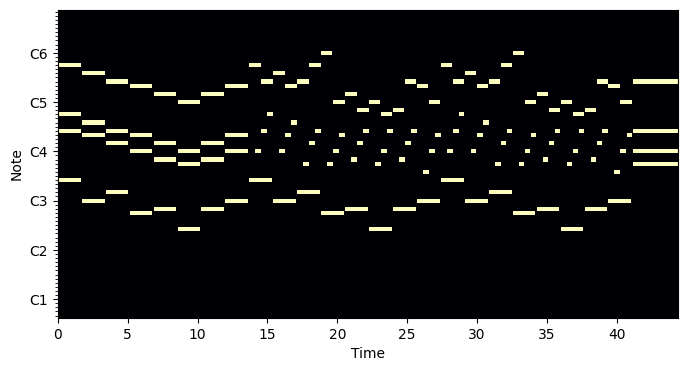

In [13]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(midi_data, 20, 95)

In [9]:
fs = 16000
IPython.display.Audio(midi_data.synthesize(fs=16000), rate=16000)

In [10]:
def get_name_track(midi_files):
    for midi in midi_files:
        a = pretty_midi.PrettyMIDI(midi)
        if (len(a.instruments)>2 and len(a.instruments)< 4):
            print(midi)
            break

In [11]:
get_name_track(midi_files)

Dataset-RAW/Canon_de_Pachelbel_4_mains.mid


In [15]:
import torch
import torch.nn as nn


In [16]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()

In [18]:
print(input.shape)
print(input)

torch.Size([3, 5])
tensor([[-0.3870,  0.1404,  1.6101,  0.8522,  0.0864],
        [ 0.5437,  0.3929, -0.9223,  0.0852,  0.5113],
        [ 0.0830, -0.7159,  0.5686,  1.0669,  2.0734]], requires_grad=True)


In [19]:
print(target.shape)
print(target)

torch.Size([3, 5])
tensor([[0.3016, 0.1458, 0.2387, 0.2030, 0.1109],
        [0.0790, 0.0160, 0.3413, 0.0522, 0.5115],
        [0.1705, 0.0620, 0.2780, 0.4394, 0.0501]])
